## Indian Start-up Funding Analysis


### Project Scenario
The Team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, I was tasked to:

- Investigate the ecosystem and propose the best course of action.
  - Analyze funding received by start-ups in India from 2018 to 2021.
  - Separate data for each year of funding will be provided.
  - Find the start-ups’ details, the funding amounts received, and the investors' information.

### Business Understanding
#### The Indian startup ecosystem has experienced significant growth and investment over the past few years. As a data expert tasked with investigating this ecosystem, our goal is to analyze the funding received by startups in India from 2018 to 2021 and provide insights to guide investment decisions. By examining the details of startups, funding amounts, and investor information, we aim to understand the trends, opportunities, and challenges within the Indian startup landscape.

### Objective
To analyze funding trends and dynamics within the Indian start-up ecosystem from 2018 to 2021 and propose strategic recommendations for the team's venture.


In [1]:
import pyodbc 
from dotenv import dotenv_values 
import numpy as np
import pandas as pd                      
import re     
import matplotlib.pyplot as plt
import statistics as stat 
from scipy import stats                
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


In [1]:
%pip install dotenv


  Using cached dotenv-0.0.5.tar.gz (2.4 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  pip subprocess to install backend dependencies did not run successfully.
  exit code: 1
  
  [33 lines of output]
    Using cached distribute-0.7.3.zip (145 kB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Installing backend dependencies: started
    Installing backend dependencies: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'error'
    error: subprocess-exited-with-error
  
    Preparing metadata (pyproject.toml) did not run successfully.
    exit code: 1
  
    [6 lines of output]
    usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
       or: setup.py --help [cmd1 cmd2 ...]
       or: setup.py --help-commands
       or: setup.py cmd --help
  
   

### First Data Set
The first data was from a database management system, that is MIRCORSOFT SQL SERVER. Connection was made to the database using an Open Database Connectivity standard library, pyodbc. <br>
Two tables were read from the databases. That is, <br>
Table 1: dbo.LP1_startup_funding2020 <br>
Table 2: dbo.LP1_startup_funding2021


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
connection = pyodbc.connect(connection_string)

In [5]:
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table.
query = "Select * from dbo.LP1_startup_funding2020"
table_1 = pd.read_sql(query, connection)


In [6]:
query = "Select * from dbo.LP1_startup_funding2021"
table_2 = pd.read_sql(query, connection)

In [7]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [8]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [9]:
table_1.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [10]:
table_1[table_1['column10'].notna()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


#### Drop column10 in table_1 since it has just two values that are not null and are also just repetition of values in Stage column 

In [11]:
# Drop column10
table_1.drop('column10', axis=1, inplace=True) if 'column10' in table_1.columns else table_1
table_1.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed


In [12]:
# Function to clean the column names

def stripper(string: str, strip: list) -> str:
    """Strips a strip list from a given string and returns the string"""
    for s in strip:
        string = string.replace(s, '')
        
    return string
    
def replacer(string: str, replace: list) -> str:
    """Replaces each character in replace list with underscore given a string and returns the string"""
    for r in replace:
        string = string.replace(r, '_')
                
    return string
    
def clean_column_names(df):
    strip   = ['(', ')', '$']
    replace = [' ', '/'] 
    df.columns = [replacer(stripper(col_name.lower(), strip), replace) for col_name in df.columns]
    return df


In [13]:
# Clean the column names
table_1 = clean_column_names(table_1)
table_2 = clean_column_names(table_2)

In [14]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1055 non-null   object 
 1   founded        842 non-null    float64
 2   headquarter    961 non-null    object 
 3   sector         1042 non-null   object 
 4   what_it_does   1055 non-null   object 
 5   founders       1043 non-null   object 
 6   investor       1017 non-null   object 
 7   amount         801 non-null    float64
 8   stage          591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [15]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1209 non-null   object 
 1   founded        1208 non-null   float64
 2   headquarter    1208 non-null   object 
 3   sector         1209 non-null   object 
 4   what_it_does   1209 non-null   object 
 5   founders       1205 non-null   object 
 6   investor       1147 non-null   object 
 7   amount         1206 non-null   object 
 8   stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


## Create year column to identify each dataset

In [16]:
# Table 1: dbo.LP1_startup_funding2020
table_1['year'] = 2020

# Table 2: dbo.LP1_startup_funding2021
table_2['year'] = 2021

### First Data Set



In [17]:
# First Data set
first_dataset = pd.concat([table_1, table_2], ignore_index=True)

first_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2264 non-null   object 
 1   founded        2050 non-null   float64
 2   headquarter    2169 non-null   object 
 3   sector         2251 non-null   object 
 4   what_it_does   2264 non-null   object 
 5   founders       2248 non-null   object 
 6   investor       2164 non-null   object 
 7   amount         2007 non-null   object 
 8   stage          1372 non-null   object 
 9   year           2264 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 177.0+ KB


## Second Data Set

In [18]:
# Load dataset
second_dataset = pd.read_csv('My data/startup_funding2019.csv')

second_dataset = clean_column_names(second_dataset)

second_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  89 non-null     object 
 1   founded        60 non-null     float64
 2   headquarter    70 non-null     object 
 3   sector         84 non-null     object 
 4   what_it_does   89 non-null     object 
 5   founders       86 non-null     object 
 6   investor       89 non-null     object 
 7   amount         89 non-null     object 
 8   stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


## Third Data Set

In [19]:
# Load dataset
third_dataset = pd.read_csv('My data/startup_funding2018.csv')

third_dataset = clean_column_names(third_dataset)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_name   526 non-null    object
 1   industry       526 non-null    object
 2   round_series   526 non-null    object
 3   amount         526 non-null    object
 4   location       526 non-null    object
 5   about_company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [20]:
# Fix location values, take every letter before the first comma as headquarter
third_dataset['location'] = [location.split(',')[0] for location in third_dataset['location']]


In [21]:
# Rename round_series to stage and location to headquarter
third_dataset.rename(columns={
    'company_name': 'company_brand', 
    'industry': 'sector', 
    'round_series': 'stage', 
    'about_company': 'what_it_does', 
    'location': 'headquarter'
    },
    inplace=True
)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_brand  526 non-null    object
 1   sector         526 non-null    object
 2   stage          526 non-null    object
 3   amount         526 non-null    object
 4   headquarter    526 non-null    object
 5   what_it_does   526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


## Create Year column to identify each dataset


In [22]:
# Create year column

# The second data is a flat-file name startup_funding2019.csv
second_dataset['year'] = 2019

# The third part of the data flat-file named startup_funding2018.csv
third_dataset['year']  = 2018

# Create the final concatenated dataset

In [23]:
# Final Data set
final_dataset = pd.concat([first_dataset, second_dataset, third_dataset], ignore_index=True)

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


In [24]:
final_dataset.head()

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


## Remove '#REF!' in random column values from final_dataset

In [25]:
# Function to remove '#REF!' from all columns
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', '')
    
    return value

# Apply the function to all columns
final_dataset = final_dataset.applymap(remove_ref) # element-wise

## Replace 'None' string values with NaN element-wise allowing for consistent representation of missing values

In [26]:
# Function replace None with NaN
def replace_none(value):
    if isinstance(value, str) and (value.lower() == 'none' or value.lower() == 'nan'):
        value = np.nan
    
    return value

# Apply the function to all columns
final_dataset = final_dataset.applymap(replace_none) # element-wise

In [27]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


## If a value in stage column is a website link, its correct value is NaN

**Website link in stage column is https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593**

In [28]:
# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'
    
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [29]:
# Remove website link values from the stage column
final_dataset['stage'] = final_dataset['stage'].apply(remove_website_link)

## As at Feb 23, 10:00:00 PM UTC, Google Finance says
### 1 Indian Rupee equals
### 0.012 United States Dollar

In [30]:
# Function to clean amount values
def floater(string):
    try:
        string = float(string)
    except ValueError:
        string = np.nan
    
    return string
    
def clean_amount(amount):    
    if isinstance(amount, str):
        # Convert to lowercase
        amount = amount.lower()
        
        # Remove any spaces
        amount = amount.replace(' ', '')
        
        # Remove commas
        amount = amount.replace(',', '')
        
        if amount == '' or amount == '—': 
            amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of 1 INR = 0.012 USD
        elif '₹' in amount:
            amount = amount.replace('₹', '')
            amount = floater(amount) * 0.012
        
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)

    
    return amount


## If the investor value is a number or contains $, the correct value for amount if missing is the investor value, the correct value for stage is the old amount value and the investor value becomes NaN or missing

In [31]:
# Identify rows where 'investor' value is numeric using clean amount function
mask = final_dataset['investor'].apply(lambda x: pd.notna(clean_amount(x)))

# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = final_dataset['stage'].isna()
final_dataset.loc[mask & stage_mask, 'stage']    = final_dataset.loc[mask, 'amount']

# Update 'amount' column with 'investor' value
final_dataset.loc[mask, 'amount']                = final_dataset.loc[mask, 'investor']

# Set 'investor' to NaN
final_dataset.loc[mask, 'investor']              = np.nan
         


## If the 'stage' value is a number or contains $, the column 'what_it does' becomes its old value concatenated with the value in the 'founder' column. The correct value for 'founder' is the 'investor' value and the correct value for 'investor' is the 'amount' value and correct 'amount' becomes the old 'stage' value while the correct value for 'stage' is NaN or missing. 


In [32]:
# Identify rows where 'stage' value is numeric using clean amount function
mask = final_dataset['stage'].apply(lambda x: pd.notna(clean_amount(x)))

# Update the 'what_it_does' column to its concatenation with 'founder' value
old_what_it_does = final_dataset.loc[mask, 'what_it_does']
old_founder      = final_dataset.loc[mask, 'founders']

final_dataset.loc[mask, 'what_it_does']    = old_what_it_does.fillna('') + ' ' + old_founder.fillna('')

# Update 'founder' column using the old 'investor' value
final_dataset.loc[mask, 'founders']         = final_dataset.loc[mask, 'investor']

# Update 'investor' column using the old 'amount' value
final_dataset.loc[mask, 'investor']        = final_dataset.loc[mask, 'amount']

# Update 'amount' column using the old 'stage' value
final_dataset.loc[mask, 'amount']          = final_dataset.loc[mask, 'stage']

# Set 'stage' to NaN
final_dataset.loc[mask, 'stage']           = np.nan

## Clean and convert amounts to USD and rename colume from amount to amount($)

In [33]:
# Clean and convert amounts to USD
final_dataset['amount'] = [clean_amount(amount) for amount in final_dataset['amount']]

In [34]:
final_dataset.rename(columns={'amount': 'amount($)'}, inplace=True)

## Replace falsely unique values or actual duplicates in categorical and string columns with their first occurence in the final_dataset

In [35]:
# Heuristic Function to replace actual duplicates with first occurrence
def replace_col_duplicates(column):
    """
        Replaces duplicates values (identified through some heuristics) in a column with their first occurrence 
        Although the first occurrence might not be the best representation but it allows for consistency in values
        
        Parameter: column
        Returns  : column with consistent representation of values
    
    """
    actual_strings = {}  # Dictionary to store the first occurrence of each modified string
    
    def replace_string(string):
        actual_string = re.sub(r'[^\w]', '', string).lower() if isinstance(string, str) else string   # Replace all special characters including whitespaces with '' 
        if actual_string in actual_strings:
            return actual_strings[actual_string]
        else:
            actual_strings[actual_string] = string
            return string
    return column.apply(replace_string)


In [36]:
columns_of_interest = ['company_brand', 'headquarter', 'sector', 'founders', 'investor', 'stage']

In [37]:
def count_unique_values(columns):
    for col in columns:
        # Print count of unique items in columns of interest
        print(f'{col}: {len(final_dataset[col].unique())}\n')

In [38]:
# Count of unique values before running replace_col_duplicates function
count_unique_values(columns_of_interest)

company_brand: 2214

headquarter: 143

sector: 875

founders: 1982

investor: 1770

stage: 72



In [39]:
# Apply the replace actual duplicates function to the string or categorical columns
for col in columns_of_interest:
    final_dataset[col] = replace_col_duplicates(final_dataset[col])


In [40]:
# Count of unique values after running replace_col_duplicates function
count_unique_values(columns_of_interest)

company_brand: 2133

headquarter: 141

sector: 819

founders: 1971

investor: 1729

stage: 57



In [41]:
# Check the number of missing values in the columns of final dataset
final_dataset.isna().sum()

company_brand      0
founded          769
headquarter      114
sector            18
what_it_does       0
founders         545
investor         633
amount($)        556
stage            940
year               0
dtype: int64

## Drop duplicated rows in final data set

In [42]:
# Drop duplicated from final dataset
final_dataset.drop_duplicates(inplace=True)

In [43]:
# Again, check the number of missing values in the columns of final dataset
final_dataset.isna().sum()

company_brand      0
founded          768
headquarter      114
sector            18
what_it_does       0
founders         544
investor         630
amount($)        554
stage            931
year               0
dtype: int64

## Change each column (founded and year) to appropriate Data types

In [44]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   float64
 2   headquarter    2742 non-null   object 
 3   sector         2838 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2226 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 245.4+ KB


In [45]:
# Founded is year and datatype should be integer 32 handling missing values gracefuly
final_dataset['founded'] = final_dataset['founded'].astype('Int32') # Int32 instead of int32

In [46]:
# Year does not need to be int64 but int32
final_dataset['year'] = final_dataset['year'].astype('int32')

In [47]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   Int32  
 2   headquarter    2742 non-null   object 
 3   sector         2838 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2226 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(7)
memory usage: 225.9+ KB


## Handle missing values in the columns of the final dataset except company_brand, what_it_does and year which have no missing values

In [48]:
final_dataset.describe(include='all')

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount($),stage,year
count,2856,2088.0,2742,2838,2856,2312,2226,2.302000e+03,1925,2856.000000
unique,2133,<NA>,139,817,2691,1969,1727,NaN,55,NaN
top,Byju's,<NA>,Bangalore,FinTech,BYJU'S is an educational technology company th...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,NaN,Seed,NaN
freq,11,<NA>,859,257,5,7,35,NaN,602,NaN
mean,NaN,2016.06705,NaN,NaN,NaN,NaN,NaN,1.213781e+08,NaN,2020.017857
std,NaN,4.368211,NaN,NaN,NaN,NaN,NaN,3.450413e+09,NaN,1.087759
min,NaN,1963.0,NaN,NaN,NaN,NaN,NaN,7.200000e+02,NaN,2018.000000
25%,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020.000000
50%,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020.000000
75%,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,1.200000e+07,NaN,2021.000000


In [49]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   Int32  
 2   headquarter    2742 non-null   object 
 3   sector         2838 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2226 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(7)
memory usage: 225.9+ KB


In [50]:
final_dataset.isna().any()

company_brand    False
founded           True
headquarter       True
sector            True
what_it_does     False
founders          True
investor          True
amount($)         True
stage             True
year             False
dtype: bool

### Founded column

In [51]:
final_dataset['founded'].unique()

<IntegerArray>
[2019, 2018, 2020, 2016, 2008, 2015, 2017, 2014, 1998, 2007, 2011, 1982, 2013,
 2009, 2012, 1995, 2010, 2006, 1978, <NA>, 1999, 1994, 2005, 1973, 2002, 2004,
 2001, 2021, 1993, 1989, 2000, 2003, 1991, 1984, 1963]
Length: 35, dtype: Int32

In [52]:
# Impute missing values in 'founded' column with median by year
founded_median_by_year = final_dataset['founded']

### Headquarter column

### Sector column

### Founders column

### Investor column

### Amount column

### Stage column

In [53]:
final_dataset['stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F', 'Edge',
       'Series H', 'Seed A', 'Series A-1', 'Seed Funding', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Angel Round',
       'Pre series A1', 'Series E2', 'Bridge Round', 'Seed Investment',
       'Series D1', 'Mid series', 'Series C, D', nan, 'Series F2',
       'Series G', 'Series B3', 'PE', 'Series F1', 'Early seed',
       'Seies A', 'Series A2', 'Series I', 'Fresh funding',
       'Post series A', 'Seed fund', 'Angel', 'Private Equity',
       'Venture - Series Unknown', 'Grant', 'Debt Financing',
       'Post-IPO Debt', 'Corporate Round', 'Undisclosed',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

### Fill missing values and replace Undisclosed values in 'stage' column with 'Venture - Series Unknown

In [54]:
# Fill missing values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].fillna('Venture - Series Unknown', inplace=True)

# Replace Undisclosed values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].replace(to_replace='Undisclosed', value='Venture - Series Unknown', inplace=True)


In [55]:
final_dataset['stage'].unique()

array(['Venture - Series Unknown', 'Pre-seed', 'Seed', 'Pre-series A',
       'Pre-series', 'Series C', 'Series A', 'Series B', 'Debt',
       'Pre-series C', 'Pre-series B', 'Series E', 'Bridge', 'Series D',
       'Series B2', 'Series F', 'Edge', 'Series H', 'Seed A',
       'Series A-1', 'Seed Funding', 'Seed round', 'Pre-seed Round',
       'Seed Round & Series A', 'Angel Round', 'Pre series A1',
       'Series E2', 'Bridge Round', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Series F2', 'Series G', 'Series B3',
       'PE', 'Series F1', 'Early seed', 'Seies A', 'Series A2',
       'Series I', 'Fresh funding', 'Post series A', 'Seed fund', 'Angel',
       'Private Equity', 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Corporate Round', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [56]:
final_dataset.isna().sum()

company_brand      0
founded          768
headquarter      114
sector            18
what_it_does       0
founders         544
investor         630
amount($)        554
stage              0
year               0
dtype: int64

## Handling Missing Values in the Founders Column
### The dataset had 545 missing values for the founders, so we decided to drop the column for founders as we will not need it for analysis

In [57]:
final_dataset.drop('founders', axis=1, inplace=True) 

## Handling Missing Values in the Sector column
### The sector column had 18 missing values so we filled them with the value Unknown

In [58]:
# Filling the missing values in sector column with Unkownn
final_dataset['sector'].fillna("Unknown", inplace=True)


In [59]:
len(re.sub(r'[^\,]', '', "ar345547686,,4,5,,"))

5

## Handling Missing values in the Investor Column
 

In [60]:
# Calculate the mode for each sector in the 'investor' column
mode_per_sector = final_dataset.groupby('sector')['investor'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")


# Fill missing values in the 'investor' column with the calculated mode per sector
final_dataset['investor'].fillna(mode_per_sector, inplace=True)


In [61]:
final_dataset.isna().sum()


company_brand      0
founded          768
headquarter      114
sector             0
what_it_does       0
investor           0
amount($)        554
stage              0
year               0
dtype: int64

## Filling null values in the column for Head Quarter

In [62]:
# Set seed for reproducibility
np.random.seed(2024)

# Identify the rows with missing 'headquarter' values
mask = final_dataset['headquarter'].isna()

# Get non-missing values for final_dataset['headquarter']
non_missing_hq = final_dataset.loc[mask==False, 'headquarter'] 

hq_missing     = mask.sum()

# Randomly sample non-missing values to fill missing values of size hq_missing, 114
hq_random      = np.random.choice(non_missing_hq, size=hq_missing)

# Fill missing values with randomly sampled headquarter values
final_dataset.loc[mask, 'headquarter'] = hq_random


In [63]:
final_dataset.isna().sum()


company_brand      0
founded          768
headquarter        0
sector             0
what_it_does       0
investor           0
amount($)        554
stage              0
year               0
dtype: int64

# Save datasets as flat files

In [64]:
# Dataset from Microsoft SQL database
# first_dataset.to_csv('DataSets/individual_csv/startup_funding2020-2021.csv')

In [65]:
# Final merged dataset with cleaned column names and cleaned amount values
# final_dataset.to_csv('DataSets/final_csv/startup_funding2018-2021.csv')

### Business Questions
####
1.What sectors have shown the highest growth in terms of funding received over the past four years?

2.What locations within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

3.Are there any notable differences in funding patterns between early-stage startups and more established companies?

4.What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

5.Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India and what factors contribute to this?

6.Which investors have more impact on startups over the years?

array([[<Axes: title={'center': 'founded'}>,
        <Axes: title={'center': 'amount($)'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

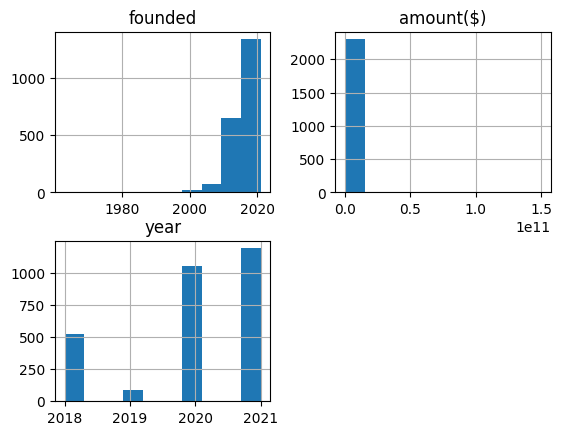

In [66]:
final_dataset.hist()

In [67]:
amount_median = final_dataset['amount($)'].median()
final_dataset['amount($)'].fillna(amount_median, inplace=True)


## Hypothesis Testing
#### Null Hypothesis(Ho): There is no siginificate difference in the amount of funding between startups in Bangalore.
#### Alternative Hypothesis(Ha): There is a siginificate difference in the amount of funding between startups in Banaglore.

### Test

In [68]:
startups_in_bangalore = final_dataset[final_dataset['headquarter']=='Bangalore']
startups_not_in_bangalore = final_dataset[final_dataset['headquarter']!='Bangalore']

In [69]:
t,p =stats.ttest_ind(startups_in_bangalore['amount($)'],startups_not_in_bangalore['amount($)'])
print(f't-value:{t}')
print(f'p-value:{p}')

t-value:-0.8262903724272099
p-value:0.4087084633975461


In [70]:
# Set Significance level
alpha = 0.05

#Compare p-value to the significance level
if p < alpha:
    print("We reject the null hypothesis. Which is there is no siginificate difference in the amount of funding between startups in Bangalore.")
else:
   print("We failed to reject the null hypothesis. There is a siginificate difference in the amount of funding between startups in Bangalore.")

We failed to reject the null hypothesis. There is a siginificate difference in the amount of funding between startups in Bangalore.


In [71]:
final_dataset.describe(include="all")

,company_brand,founded,headquarter,sector,what_it_does,investor,amount($),stage,year
count,2856,2088.0,2856,2856,2856,2856,2.856000e+03,2856,2856.000000
unique,2133,<NA>,139,818,2691,1728,NaN,54,NaN
top,Byju's,<NA>,Bangalore,FinTech,BYJU'S is an educational technology company th...,Unknown,NaN,Venture - Series Unknown,NaN
freq,11,<NA>,896,257,5,449,NaN,970,NaN
mean,NaN,2016.06705,NaN,NaN,NaN,NaN,9.841537e+07,NaN,2020.017857
std,NaN,4.368211,NaN,NaN,NaN,NaN,3.097961e+09,NaN,1.087759
min,NaN,1963.0,NaN,NaN,NaN,NaN,7.200000e+02,NaN,2018.000000
25%,NaN,2015.0,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020.000000
50%,NaN,2017.0,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020.000000
75%,NaN,2019.0,NaN,NaN,NaN,NaN,8.000000e+06,NaN,2021.000000


In [72]:
final_dataset['headquarter'].value_counts()

headquarter
Bangalore                           896
Mumbai                              484
Gurugram                            248
New Delhi                           242
Chennai                             109
                                   ... 
Berlin                                1
Tangerang, Jawa Barat, Indonesia      1
San Franciscao                        1
Dehradun                              1
Guindy                                1
Name: count, Length: 139, dtype: int64

Made with 💖 [Gabriel Okundaye](https://www.linkedin.com/in/dr-gabriel-okundaye)
<span style="color: #aaaaaa;">Blood and sweat</span>


In [73]:
# import re

# # Function to convert Indian Rupees to dollars
# def inr_to_usd(amount):
#     inr_to_usd_rate = 0.014  # Assuming 1 INR = 0.014 USD
#     if '₹' in amount:
#         amount = re.sub(r'[^\d.]', '', amount)  # Remove non-digit characters
#         amount = float(amount) * inr_to_usd_rate
#     return amount

# # Convert Indian Rupees to dollars
# df['amount'] = df['amount'].apply(inr_to_usd)

# # Function to remove dollar sign and convert to int
# def clean_amount(amount):
#     if '$' in amount:
#         amount = re.sub(r'[^\d.]', '', amount)  # Remove non-digit characters
#         amount = int(amount)
#     return amount

# # Remove dollar sign and convert to int
# df['amount'] = df['amount'].apply(clean_amount)

# df